## Лабораторная работа 1

#### Задание 1

Найти набор данных (датасет) для классификации удовлетворяющий следующим условиям: более 10 000 строк, более 20 столбцов, разные типы в столбцах, обязательно наличие целевого признака (таргета).

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
frame = pd.read_csv('data.csv', sep=';', encoding='cp1252')
predictors = ['cap-diameter', 'stem-height']
outcome = 'class'
frame

class  cap-diameter cap-shape cap-surface cap-color  \
0         p         15.26         x           g         o   
1         p         16.60         x           g         o   
2         p         14.07         x           g         o   
3         p         14.17         f           h         e   
4         p         14.64         x           h         o   
...     ...           ...       ...         ...       ...   
61064     p          1.18         s           s         y   
61065     p          1.27         f           s         y   
61066     p          1.27         s           s         y   
61067     p          1.24         f           s         y   
61068     p          1.17         s           s         y   

      does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                        f               e          NaN          w   
1                        f               e          NaN          w   
2                        f               e          NaN          w   
3                        f               e          NaN          w   
4                        f               e          NaN          w   
...                    ...             ...          ...        ...   
61064                    f               f            f          f   
61065                    f               f            f          f   
61066                    f               f            f          f   
61067                    f               f            f          f   
61068                    f               f            f          f   

       stem-height  ...  stem-root stem-surface stem-color veil-type  \
0            16.95  ...          s            y          w         u   
1            17.99  ...          s            y          w         u   
2            17.80  ...          s            y          w         u   
3            15.77  ...          s            y          w         u   
4            16.53  ...          s            y          w         u   
...            ...  ...        ...          ...        ...       ...   
61064         3.93  ...        NaN          NaN          y       NaN   
61065         3.18  ...        NaN          NaN          y       NaN   
61066         3.86  ...        NaN          NaN          y       NaN   
61067         3.56  ...        NaN          NaN          y       NaN   
61068         3.25  ...        NaN          NaN          y       NaN   

      veil-color has-ring ring-type spore-print-color habitat season  
0              w        t         g               NaN       d      w  
1              w        t         g               NaN       d      u  
2              w        t         g               NaN       d      w  
3              w        t         p               NaN       d      w  
4              w        t         p               NaN       d      w  
...          ...      ...       ...               ...     ...    ...  
61064        NaN        f         f               NaN       d      a  
61065        NaN        f         f               NaN       d      a  
61066        NaN        f         f               NaN       d      u  
61067        NaN        f         f               NaN       d      u  
61068        NaN        f         f               NaN       d      u  

[61069 rows x 21 columns]

Подготовка данных для тестирования

In [3]:
frame.isnull().sum()
frame = frame.astype({
                      'class' : 'category',
                      'cap-shape' : 'category',
                      'cap-diameter' : 'float16',
                      'cap-surface' : 'category',
                      'cap-color' : 'category',
                      'does-bruise-or-bleed' : 'category',
                      'gill-attachment' : 'category',
                      'gill-spacing' : 'category',
                      'gill-color' : 'category',
                      'stem-height' : 'float16',
                      'stem-width' : 'float16',
                      'stem-root' : 'category',
                      'stem-surface' : 'category',
                      'stem-color' : 'category',
                      'veil-type' : 'category',
                      'veil-color' : 'category',
                      'has-ring' : 'category',
                      'ring-type' : 'category',
                      'spore-print-color' : 'category',
                      'habitat' : 'category',
                      'season' : 'category'
                      })
frame.dtypes

class                   category
cap-diameter             float16
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float16
stem-width               float16
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object

In [4]:
encoder = LabelEncoder()
for column in frame.columns:
    if frame[column].dtype == 'category':
        frame[column] = encoder.fit_transform(frame[column])

frame.head()

class  cap-diameter  cap-shape  cap-surface  cap-color  \
0      1     15.257812          6            2          6   
1      1     16.593750          6            2          6   
2      1     14.070312          6            2          6   
3      1     14.171875          2            3          1   
4      1     14.640625          6            3          6   

   does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
0                     0                2             3          10   
1                     0                2             3          10   
2                     0                2             3          10   
3                     0                2             3          10   
4                     0                2             3          10   

   stem-height  ...  stem-root  stem-surface  stem-color  veil-type  \
0    16.953125  ...          4             7          11          0   
1    17.984375  ...          4             7          11          0   
2    17.796875  ...          4             7          11          0   
3    15.773438  ...          4             7          11          0   
4    16.531250  ...          4             7          11          0   

   veil-color  has-ring  ring-type  spore-print-color  habitat  season  
0           4         1          2                  7        0       3  
1           4         1          2                  7        0       2  
2           4         1          2                  7        0       3  
3           4         1          5                  7        0       3  
4           4         1          5                  7        0       3  

[5 rows x 21 columns]

 Разделим датасет на обучающую выборку и тестовую выборку. Обучающая выборка будет использоваться для обучения модели, а тестовая выборка - для оценки ее точности

 20% данных будет использоваться для тестирования моделей

In [5]:
y = frame['class'].values
x = frame.drop(['class'], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Задание 2

Провести классификацию найденного датасета, методом к- ближайших соседей. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [7]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [8]:
train_preds = model.predict(x_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print(f'Ошибка прогноза на обучающих данных : {rmse}')

Ошибка прогноза на обучающих данных : 0.011970009944089892


In [9]:
test_preds = model.predict(x_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print(f'Ошибка прогноза на тестовых данных : {rmse}')

Ошибка прогноза на тестовых данных : 0.012796347931595242


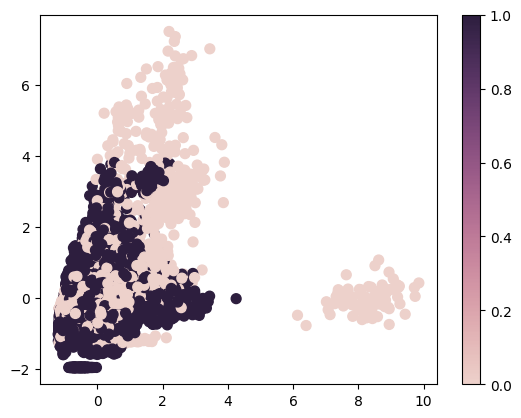

In [10]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test[:, 0], x_test[:, 8], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

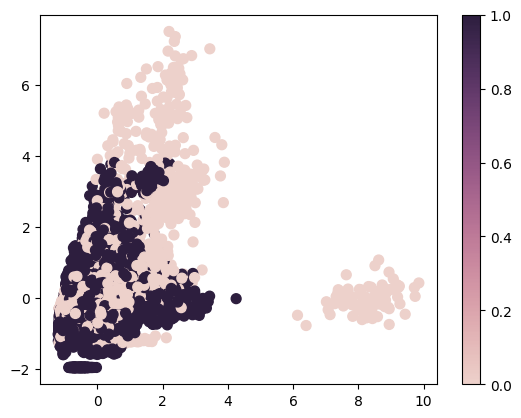

In [11]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test[:, 0], x_test[:, 8], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

**Улучшение производительности kNN**

Чтобы найти лучшее значение для k, будем использовать инструмент под названием GridSearchCV. Это инструмент, который часто используется для настройки гиперпараметров моделей машинного обучения. В вашем случае это поможет автоматически найти наилучшее значение k для набора данных.

In [12]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_

{'n_neighbors': 1}

In [13]:
train_preds_grid = gridsearch.predict(x_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(x_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print(f'Ошибка прогноза на обучающих данных : {train_rmse}')
print(f'Ошибка прогноза на тестовых данных : {test_rmse}')

Ошибка прогноза на обучающих данных : 0.0
Ошибка прогноза на тестовых данных : 0.0


**Метод k-ближайших соседей – это простой алгоритм машинного обучения с учителем, который можно использовать для решения задач классификации и регрессии. Он прост в реализации и понимании, но имеет существенный недостаток – значительное замедление работы, когда объем данных растет.**

## Лабораторная работа 2

#### Задание 1

Провести классификацию найденного датасета, методом машины опорных векторов. В формате Markdown писать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [14]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

Метод опорных векторов (МОВ) — это техника машинного обучения с учителем. Она используется в классификации, может быть применена к регрессионным задачам.

Метод определяет границу принятия решения (ГПР) вместе с максимальным зазором, который разделяет почти все точки на два класса, оставляя место для неправильной классификации.

Цель МОВ — определить гиперплоскость (также называется “разделяющей” или “ГПР”), которая разделяет точки на два класса.

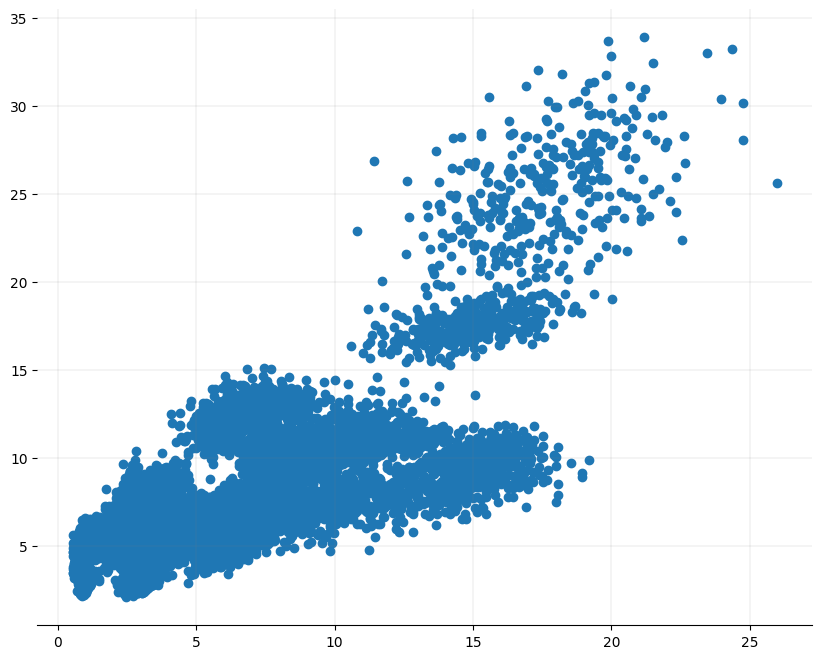

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(frame[:len(x_test)]['cap-diameter'], frame[:len(x_test)]['stem-height'])
plt.show()

In [16]:
model = svm.SVC(kernel='poly')
model.fit(x_train, y_train)

SVC(kernel='poly')

In [17]:
y_pred = model.predict(x_test)
print(f'Точность модели : {accuracy_score(y_test, y_pred)}')
print(f'Отзыв модели : {metrics.recall_score(y_test, y_pred)}')

Точность модели : 0.9896020959554609
Отзыв модели : 0.9915204678362574


**Гиперпараметры**

**C (регуляризация)** : Определяет силу регуляризации в модели SVM (Support Vector Machine / Машина опорных векторов); более низкое значение C увеличивает штраф за неправильную классификацию, что может привести к созданию простой модели с большей обобщающей способностью.

**gamma (ядерный коэффициент)** : Определяет влияние одного тренировочного примера на другие; меньшие значения gamma означают более широкие гауссовы функции и приводят к более простым/прямым границам решения.

**kernel (ядро)** : Определяет тип использованного ядра (линейное или RBF); линейное ядро работает линейно, тогда как RBF (радиально-базисная функция) способно моделировать сложные границы решений.

In [18]:
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': [0.1, 1, 10]}

##### Перекрестная проверка гиперпараметров

In [19]:
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

best_params = grid.best_params_
best_score = grid.best_score_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.657 total time=  59.3s
[CV 2/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.654 total time=  59.3s
[CV 3/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.659 total time=  58.9s
[CV 4/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.655 total time=  58.9s
[CV 5/5] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.661 total time=  58.9s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.894 total time= 1.8min
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.895 total time= 2.0min
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.897 total time= 1.9min
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.891 total time= 2.1min
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.897 total time= 1.9min
[CV 1/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.469 total time= 1.5min
[CV 2/5] END .C=0.01, gamma=0.1, kernel=sigmoid

In [20]:
print(f'Лучшие гиперпараметры : {best_params}')

best_svc = grid.best_estimator_
y_pred = best_svc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели : {accuracy}')

report = classification_report(y_test, y_pred, zero_division=1)
print(f'Отчет о классификации : \n{report}')

Лучшие гиперпараметры : {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Точность модели : 0.9998362534796136
Отчет о классификации : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



Классификаторы SVM обеспечивают хорошую точность и выполняют более быстрое прогнозирование. Они также используют меньше памяти, поскольку на этапе принятия решения используют подмножество тренировочных точек. SVM хорошо работает с четким запасом разделения и с пространством большой размерности.

SVM не подходит для больших наборов данных из-за большого времени обучения. Он плохо работает с перекрывающимися классами, а также чувствителен к типу используемого ядра.

## Лабораторная работа 3

#### Задание 1

Провести классификацию найденного датасета, методами линеной и логистической регрессий . В формате Markdown написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

##### Линейная регрессия

**Линейная регрессия** – одна из важнейших и широко используемых техник регрессии. Эта самый простой метод регрессии. Одним из его достоинств является лёгкость интерпретации результатов.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [22]:
model = LinearRegression() 
model.fit(x_train, y_train) 
linear_accuracy = model.score(x_test, y_test)

In [23]:
train_pred = model.predict(x_train)
mse = mean_squared_error(y_train, train_pred)
rmse = sqrt(mse)

print(f'Ошибка прогноза на обучающих данных : {rmse}')
print("Коэффициент R2 : %.2f" % r2_score(y_test, y_pred))

Ошибка прогноза на обучающих данных : 0.46856826530509
Коэффициент R2 : 1.00


In [24]:
test_pred = model.predict(x_test)
mse = mean_squared_error(y_test, test_pred)
rmse = sqrt(mse)

print(f'Ошибка прогноза на тестовых данных : {rmse}')
print("Коэффициент R2 : %.2f" % r2_score(y_test, y_pred))

Ошибка прогноза на тестовых данных : 0.466585091490068
Коэффициент R2 : 1.00


##### Логистическая регрессия

**Логистическая регрессия** - это статистический метод анализа набора данных, в котором есть одна или несколько независимых переменных, определяющих результат. Результат измеряется с помощью дихотомической переменной (в которой есть только два возможных результата)

**Гиперпараметры :**

**C:** обратная сила регуляризации. Меньшие значения C указывают на более сильную регуляризацию. 

**penalty:** задает тип регуляризации (например, L1 или L2). 

**solver:** алгоритм, используемый для оптимизации весов (например, 'liblinear', 'saga', 'lbfgs' и другие).

In [25]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

##### Перекрестная проверка гиперпараметров

In [26]:
logistic = LogisticRegression(max_iter=1000)
grid = GridSearchCV(logistic, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.650 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.647 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.654 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.652 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.659 total time=   0.0s
[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.650 total time=   0.1s
[CV 2/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.645 total time=   0.2s
[CV 3/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.653 total time=   0.2s
[CV 4/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.651 total time=   0.1s
[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.659 total time=   0.1s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1, 

e:\Coding\python\dynamic-languages-2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Coding\python\dynamic-languages-2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Coding\python\dynamic-languages-2\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Coding\python\dynamic-languages-2\.venv\Lib\site-pack

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             verbose=3)

In [27]:
best_logistic = grid.best_estimator_
logistic_accuracy = best_logistic.score(x_test, y_test)
print(f"Лучшие гиперпараметры логистической регрессии: {grid.best_params_}")
print(f"Точность модели логистической регрессии: {logistic_accuracy}")
print(f"Точность модели линейной регрессии: {linear_accuracy}")

y_pred = best_logistic.predict(x_test)

print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))

Лучшие гиперпараметры логистической регрессии: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Точность модели логистической регрессии: 0.6574422793515637
Точность модели линейной регрессии: 0.11646494870130308

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.63      0.53      0.58      5374
           1       0.67      0.76      0.71      6840

    accuracy                           0.66     12214
   macro avg       0.65      0.64      0.64     12214
weighted avg       0.65      0.66      0.65     12214



## Лабораторная работа 4

#### Задание 1

Провести классификацию найденного датасета, методами наивного Байеса  . В формате Markdown написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [28]:
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt

**Наивный Байес** – это самый простой алгоритм, который можно применить к своим данным. Как следует из названия, этот алгоритм делает предположение, что все переменные в наборе данных "наивные", т.е. не коррелируют друг с другом.

In [29]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [30]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели : {accuracy}')

print('\nОтчет по классификации : ')
print(classification_report(y_test, y_pred))

Точность модели : 0.6035696741444244

Отчет по классификации : 
              precision    recall  f1-score   support

           0       0.54      0.69      0.61      5374
           1       0.69      0.53      0.60      6840

    accuracy                           0.60     12214
   macro avg       0.61      0.61      0.60     12214
weighted avg       0.62      0.60      0.60     12214



<Axes: title={'center': 'Матрица'}, xlabel='Predicted label', ylabel='True label'>

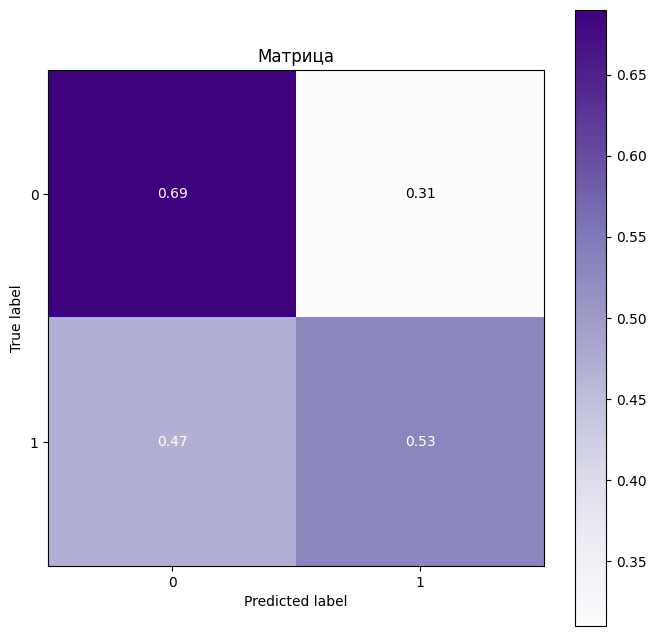

In [31]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    normalize=True,
                                    title='Матрица',
                                    cmap='Purples',
                                    ax=ax
                                    )

**Гиперпараметры :**

**priors** - Он принимает массивы shape (n_classes,), указывающие предыдущие вероятности целевых классов.

**var_smoothing** - Он принимает значение с плавающей точкой, указывающее часть наибольшей дисперсии всех объектов, которая добавляется к дисперсиям для сглаживания.

In [32]:
param_grid= {
    'priors':[None,[0.1,]*len(np.unique(y_train)),],
    'var_smoothing':[1e-9, 1e-6, 1e-12],
    }

##### Перекрестная проверка гиперпараметров

In [33]:
grid = GridSearchCV(GaussianNB(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

print(f'Лучшая точность модели : {grid.best_score_}')
print(f'Лучшие параметры : {grid.best_params_}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..priors=None, var_smoothing=1e-09;, score=0.600 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-09;, score=0.599 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-09;, score=0.609 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-09;, score=0.600 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-09;, score=0.595 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-06;, score=0.600 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-06;, score=0.599 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-06;, score=0.609 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-06;, score=0.600 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-06;, score=0.595 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-12;, score=0.600 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-12;,

e:\Coding\python\dynamic-languages-2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Coding\python\dynamic-languages-2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Coding\python\dynamic-languages-2\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Coding\python\dynamic-languages-2\.venv\Lib\site-packa

In [34]:
y_pred_test = grid.best_estimator_.predict(x_test)
y_pred_train = grid.best_estimator_.predict(x_train)

print('Точность модели на тестовых данных : {:.3f}'.format(accuracy_score(y_test, y_pred_test)))
print('Точность модели на обучающих данных : {:.3f}'.format(accuracy_score(y_train, y_pred_train)))

print('\nОтчет по классификации : \n')
print(classification_report(y_test, y_pred_test))

Точность модели на тестовых данных : 0.604
Точность модели на обучающих данных : 0.601

Отчет по классификации : 

              precision    recall  f1-score   support

           0       0.54      0.69      0.61      5374
           1       0.69      0.53      0.60      6840

    accuracy                           0.60     12214
   macro avg       0.61      0.61      0.60     12214
weighted avg       0.62      0.60      0.60     12214



<Axes: title={'center': 'Матрица'}, xlabel='Predicted label', ylabel='True label'>

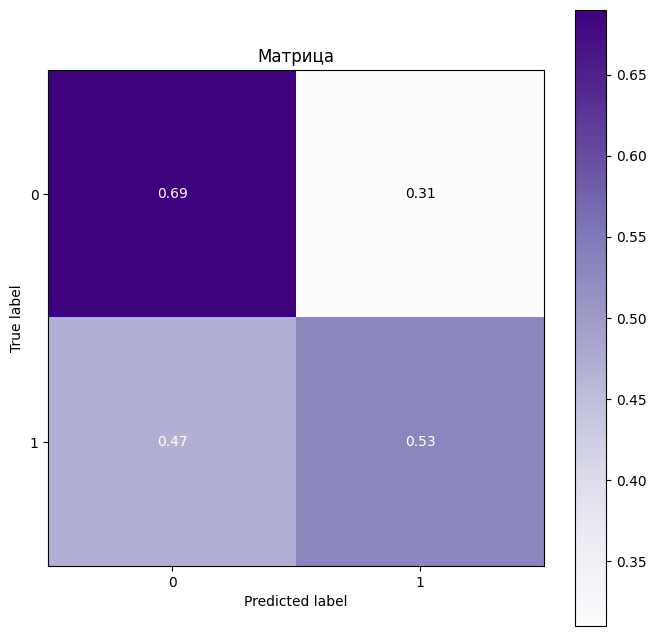

In [35]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test,
                                    normalize=True,
                                    title="Матрица",
                                    cmap="Purples",
                                    ax=ax)

## Лабораторная работа 5

#### Задание 1

Провести классификацию найденного датасета, методами решающего дерева и случайного леса . В формате Markdown написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

##### Метод решающего дерева

**Гиперпараметры :**

**max_depth:** Максимальная глубина дерева. Ограничивает количество уровней в дереве. Значение None позволяет узлам расширяться до тех пор, пока все листовые узлы не будут содержать минимальное количество выборок. 

**min_samples_split:** Минимальное количество выборок, необходимых для разделения внутреннего узла. Если количество выборок в узле меньше этого значения, узел не будет разделяться.

**min_samples_leaf:** Минимальное количество выборок, необходимых для существования листового узла. Это определяет, сколько выборок должно быть на каждом листе.

In [37]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [38]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели : {accuracy}')

print('\nОтчет по классификации : ')
print(classification_report(y_test, y_pred))

Точность модели : 0.9968888161126576

Отчет по классификации : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



In [41]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.998 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.997 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.997 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.996 total time=   0.1s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.995 total time=   0.1s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.997 total time=   0.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.998 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.997 total time=   0.1s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.996 total time=   0.1s
[CV 5/5] END max_dep

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [43]:
print('Лучшие параметры для решающего дерева :', grid.best_params_)
print('Лучшая точность для решающего дерева :', grid.best_score_)

test_score = grid.score(x_test, y_test)
print(f'Точность на тестовом наборе данных : {test_score}')

y_pred = grid.best_estimator_.predict(x_test)

print("\nОтчет по классификации :")
print(classification_report(y_test, y_pred))

Лучшие параметры для решающего дерева : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая точность для решающего дерева : 0.9967864087606181
Точность на тестовом наборе данных : 0.9968069428524644

Отчет по классификации :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



##### Метод случайного дерева

**Гиперпараметры :**

**n_estimators :** Количество деревьев в лесу. Большее количество деревьев может улучшить производительность, но с большими затратами на вычислительные ресурсы. 

**max_depth :** Максимальная глубина каждого дерева в лесу. Это ограничивает глубину каждого дерева в лесу, что помогает управлять переобучением. 

**min_samples_split :** Минимальное количество выборок, необходимых для разделения внутреннего узла дерева. Определяет, сколько выборок должно быть в узле, чтобы он был разделен.

**min_samples_leaf :** Минимальное количество выборок, необходимых для существования листового узла. Это определяет, сколько выборок должно быть на каждом листе дерева.

In [44]:
param_grid = {
    'n_estimators': range(2, 10),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

In [46]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(x_train, y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.995 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.996 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.995 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.993 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=2;, score=0.995 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=3;, score=0.999 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=3;, score=0.999 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=3;, score=0.999 total time= 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': range(2, 10)},
             verbose=3)

In [47]:
print('Лучшие параметры для случайного леса : ', grid.best_params_)
print('Лучшая точность для случайного леса : ', grid.best_score_)

test_score = grid.score(x_test, y_test)
print(f'Точность на тестовом наборе данных : {test_score}')

y_pred = grid.best_estimator_.predict(x_test)

print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))

Лучшие параметры для случайного леса :  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 8}
Лучшая точность для случайного леса :  0.9998362501279295
Точность на тестовом наборе данных : 0.9999181267398067

Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



## Лабораторная работа 6

#### Задание 1

Провести классификацию найденного датасета, методами CatBoost . В формате Markdown написать пояснения. Объяснить почему были выбраны именно такие гиперпараметры, была ли перекрестная проверка, и т.д.

In [48]:
from catboost import CatBoostClassifier

**Гиперпараметры :**

**depth :** Этот параметр определяет глубину дерева. Увеличение значения этого параметра увеличивает сложность модели, что может привести к более точной подгонке к тренировочным данным, но также увеличивает риск переобучения.

**learning_rate :** Определяет скорость обучения модели. Этот параметр контролирует величину, на которую обновляются веса модели при каждой итерации. Более низкие значения могут способствовать стабильному обучению, но могут потребовать большего количества итераций для достижения оптимальной точности.

**l2_leaf_reg :** Этот параметр отвечает за коэффициент регуляризации L2 (Ridge). Он контролирует сложность модели, ограничивая веса и предотвращая переобучение. Большие значения могут уменьшить сложность модели, но могут также уменьшить её точность на тренировочных данных.

In [49]:
param_grid = {
    'depth': [1, 4, 7, 10],
    'learning_rate': [0.01, 0.1, 1],
    'l2_leaf_reg': [1, 3, 5, 9],
    'iterations': [100, 200,],
    'depth': [0, 3, 6],
    'loss_function': ['MultiClass', 'Logloss']
}

In [51]:
grid = GridSearchCV(CatBoostClassifier(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
0:	learn: 0.6930326	total: 3.5ms	remaining: 347ms
1:	learn: 0.6929203	total: 5.96ms	remaining: 292ms
2:	learn: 0.6928103	total: 8.22ms	remaining: 266ms
3:	learn: 0.6927024	total: 10.5ms	remaining: 251ms
4:	learn: 0.6925967	total: 13.4ms	remaining: 254ms
5:	learn: 0.6924931	total: 16.3ms	remaining: 256ms
6:	learn: 0.6923915	total: 18.8ms	remaining: 249ms
7:	learn: 0.6922920	total: 21.3ms	remaining: 245ms
8:	learn: 0.6921944	total: 24.2ms	remaining: 245ms
9:	learn: 0.6920988	total: 26.9ms	remaining: 242ms
10:	learn: 0.6920051	total: 29.7ms	remaining: 240ms
11:	learn: 0.6919132	total: 32.5ms	remaining: 239ms
12:	learn: 0.6918232	total: 35.2ms	remaining: 235ms
13:	learn: 0.6917350	total: 37.8ms	remaining: 232ms
14:	learn: 0.6916485	total: 40.2ms	remaining: 228ms
15:	learn: 0.6915637	total: 42.6ms	remaining: 224ms
16:	learn: 0.6914806	total: 45.3ms	remaining: 221ms
17:	learn: 0.6913992	total: 48ms	remaining: 219ms
18:	learn: 0.6

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000010FAF7A5250>,
             param_grid={'depth': [0, 3, 6], 'iterations': [100, 200],
                         'l2_leaf_reg': [1, 3, 5, 9],
                         'learning_rate': [0.01, 0.1, 1],
                         'loss_function': ['MultiClass', 'Logloss']},
             verbose=3)

In [52]:
print(f'Лучшие параметры модели : {grid.best_params_}')
print(f'Лучшая точность модели : {grid.best_score_}')

test_score = grid.score(x_test, y_test)
print(f'Точность на тестовом наборе данных : {test_score}')

y_pred = grid.best_estimator_.predict(x_test)

print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))

Лучшие параметры модели : {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'loss_function': 'Logloss'}
Лучшая точность модели : 0.9999385937979735
Точность на тестовом наборе данных : 1.0

Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5374
           1       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

